In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [2]:
chkpt = "results/checkpoints_20200425-2305"
# chkpt = "org_checkpoints_20200425-2347"
epochs = 10

In [3]:
import tensorflow as tf
file_writer = tf.summary.create_file_writer(chkpt + "/val_losses")
file_writer.set_as_default()

In [37]:
from scipy.special import expit, logit
mn, mx = expit(-1), expit(1)
norm = lambda x: (x - mn) / (mx - mn)

# Training
---
## Losses

In [5]:
with open(f"{chkpt}/train_losses.pkl", "rb") as handle:
    train_losses = pickle.load(handle)
train_losses = np.asarray(train_losses).reshape((epochs, -1))
# train_losses = norm(train_losses)

In [6]:
for i, tl in enumerate(train_losses): 
    tf.summary.histogram("train_losses", tl, step=i)

# Probs

In [7]:
with open(f"{chkpt}/train_preds.pkl", "rb") as handle:
    train_preds = pickle.load(handle)
train_preds = np.asarray([p.detach().numpy() for p in train_preds]).reshape((epochs, -1))
train_preds = norm(train_preds)

In [8]:
for i, tp in enumerate(train_preds): 
    tf.summary.histogram("train_preds", tp, step=i)

# Validation
---
## Losses

In [9]:
val_dicts = []
for i in range(1, epochs+1):
    with open(f"{chkpt}/validation_epoch_{i:02d}.pth", "rb") as handle:
        val_dicts.append(pickle.load(handle))

In [10]:
val_losses = np.asarray([vd["losses"].numpy() for vd in val_dicts])
for i, vl in enumerate(val_losses): 
    tf.summary.histogram("val_losses", vl, step=i)

In [11]:
print(train_losses.mean(axis=-1), "\n")
print(val_losses.mean(axis=-1), "\n")

[0.5635839  0.57899475 0.5692342  0.5585975  0.5603221  0.56131154
 0.5590397  0.5644516  0.55026317 0.5697498 ] 

[0.6311042 0.613545  0.6023086 0.5986705 0.5897551 0.5881862 0.5771536
 0.5759237 0.5705446 0.5635549] 



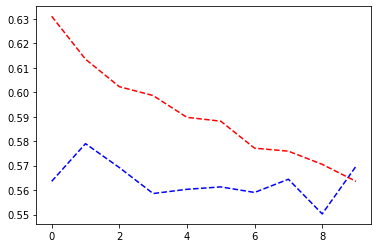

In [12]:
plt.plot(range(epochs), train_losses.mean(axis=-1), '--', c="blue")
plt.plot(range(epochs), val_losses.mean(axis=-1), '--', c="red")

(1400,)
(280,)


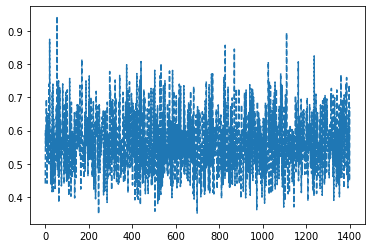

In [46]:
train_batches = train_losses.flatten().reshape((-1, 10)).mean(axis=-1)
val_batches = val_losses.flatten().reshape((-1, 500)).mean(axis=-1)
print(train_batches.shape)
print(val_batches.shape)
plt.plot(range(1400), train_batches, '--')
# plt.plot(range(280), val_batches, '--')

## Probs

In [17]:
val_probs = np.asarray([vd["probs"].numpy() for vd in val_dicts])
val_probs = norm(val_probs)
for i, vp in enumerate(val_probs):
    print(i)
    tf.summary.histogram("val_probs", vp, step=i)

0
1
2
3
4
5
6
7
8
9


In [14]:
from scipy.special import expit
mn, mx = expit(-1), expit(1)
norm = lambda x: (x - mn) / (mx - mn)
norm(val_probs).max()

1.5817707

In [15]:
rands = expit(np.random.uniform(-1, 1, 100000))

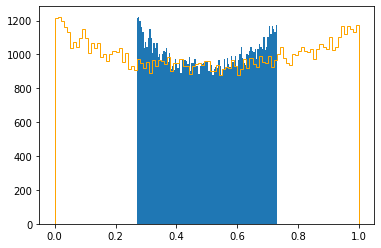

In [16]:
_ = plt.hist(rands, bins=100)
_ = plt.hist(norm(rands), bins=100, color="orange", histtype="step")

In [42]:
expit(-1), logit(0.4), expit(1)

(0.2689414213699951, -0.4054651081081643, 0.7310585786300049)